In [1]:
from pandas import pandas
from data_actual import data

program_df = pandas.DataFrame(data, columns=["University", "Program"])

# Extract country from the University column
program_df["Country"] = program_df["University"].apply(lambda x: x.split(", ")[-1])

# Remove the country from the University column
program_df["University"] = program_df["University"].apply(lambda x: ", ".join(x.split(", ")[:-1]))

program_df

,University,Program,Country
0,Stellenbosch University,MSc in Quantitative Ecology,South Africa
1,University of Cape Town,MSc in Statistical Ecology and Environmental M...,South Africa
2,University of KwaZulu-Natal,MSc in Applied Statistics (Ecology and Environ...,South Africa
3,University of Cape Town,MSc in Statistical Sciences (Ecology and Envir...,South Africa
4,Rhodes University,MSc in Ecology and Statistics,South Africa
5,University of the Witwatersrand,MSc in Statistics and Environmental Science,South Africa
6,University of Nairobi,MSc in Environmental Statistics,Kenya
7,Makerere University,MSc in Environmental Statistics,Uganda
8,University of Ghana,MSc in Statistics (Ecology and Environmental S...,Ghana
9,University of Ibadan,MSc in Statistical Ecology,Nigeria


In [2]:
from pandas import pandas
from data_all import universities, universities_details
 
all_pro = pandas.DataFrame(universities_details)
all_pro = all_pro.rename(columns={'country': 'Country', 'name': 'University', 'longitude': 'Longitude', 'latitude': 'Latitude'})

all_pro.head(2)


,University,Country,Longitude,Latitude
0,University of Cape Town,South Africa,-18.4719,-33.9628
1,Stellenbosch University,South Africa,-18.8679,-33.9321


In [3]:

# Concatenate the two DataFrames along columns
# result = pandas.merge([program_df, all_pro], on=["University", "Country"], how="inner")
result = program_df.merge(all_pro, on=["University", "Country"], how="inner")
result = result.drop_duplicates(subset=["University", "Program"], keep="first")
result = result.reset_index(drop=True)
result = result.dropna()
result.loc[result['University'] == 'Stellenbosch University', ['Longitude', 'Latitude']] = [18.8679, -33.9321]
result.loc[result['University'] == 'University of Cape Town', ['Longitude', 'Latitude']] = [18.4719, -33.9628]
result

,University,Program,Country,Longitude,Latitude
0,Stellenbosch University,MSc in Quantitative Ecology,South Africa,18.8679,-33.9321
1,University of Cape Town,MSc in Statistical Ecology and Environmental M...,South Africa,18.4719,-33.9628
2,University of Cape Town,MSc in Statistical Sciences (Ecology and Envir...,South Africa,18.4719,-33.9628
3,University of KwaZulu-Natal,MSc in Applied Statistics (Ecology and Environ...,South Africa,30.9866,-29.8709
4,Rhodes University,MSc in Ecology and Statistics,South Africa,26.8816,-33.3108
5,University of the Witwatersrand,MSc in Statistics and Environmental Science,South Africa,28.0382,-26.1892
6,University of Nairobi,MSc in Environmental Statistics,Kenya,36.8219,-1.2777
7,Makerere University,MSc in Environmental Statistics,Uganda,32.5695,0.3360
8,University of Ghana,MSc in Statistics (Ecology and Environmental S...,Ghana,-0.1850,5.6420
9,University of Ibadan,MSc in Statistical Ecology,Nigeria,3.8990,7.3775


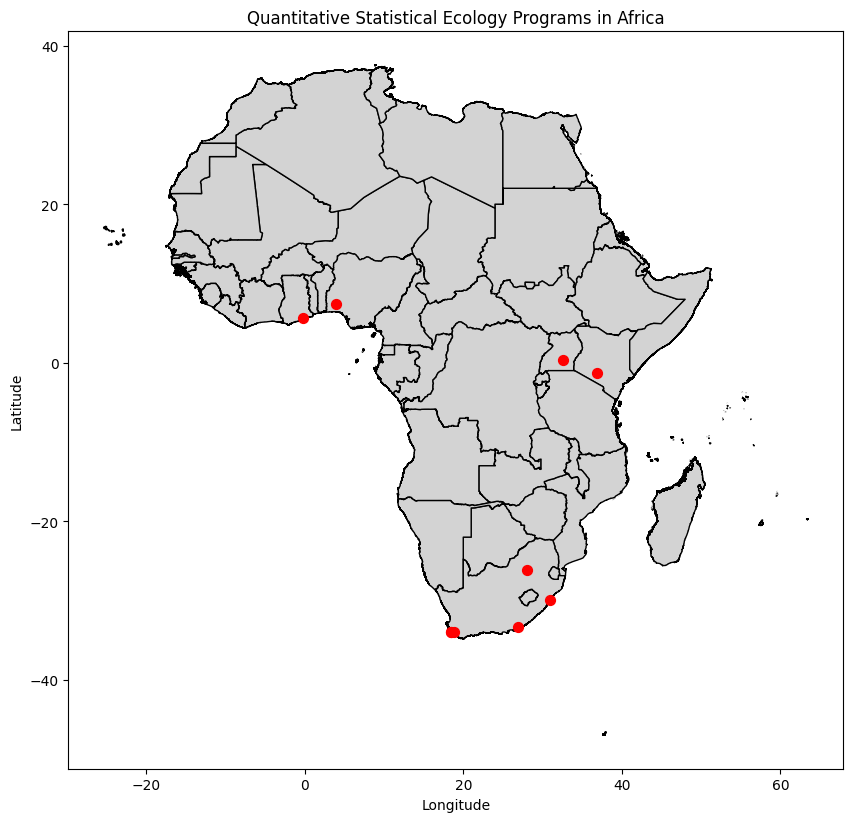

In [4]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Load shapefile or GeoJSON file of African country boundaries
africa_shapefile = "/Users/asmaatbaeen/Desktop/codePhD/Ch1/afr_g2014_2013_0/afr_g2014_2013_0.shp"  # Replace with the actual file path
  
longitudes = result["Longitude"]
latitudes = result["Latitude"]
# Create a GeoDataFrame from latitude and longitude values
geometry = gpd.points_from_xy(longitudes, latitudes)
program_gdf = gpd.GeoDataFrame(result, geometry=geometry)

# Read shapefile of African country boundaries
africa_gdf = gpd.read_file(africa_shapefile)

# Plotting
fig, ax = plt.subplots(figsize=(10, 10))

# Plot African country boundaries
africa_gdf.plot(ax=ax, color="lightgray", edgecolor="black")

# Plot quantitative statistical ecology program locations
program_gdf.plot(ax=ax, color="red", markersize=50)

# Set plot title and labels
ax.set_title("Quantitative Statistical Ecology Programs in Africa")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

# Show the plot
plt.show()


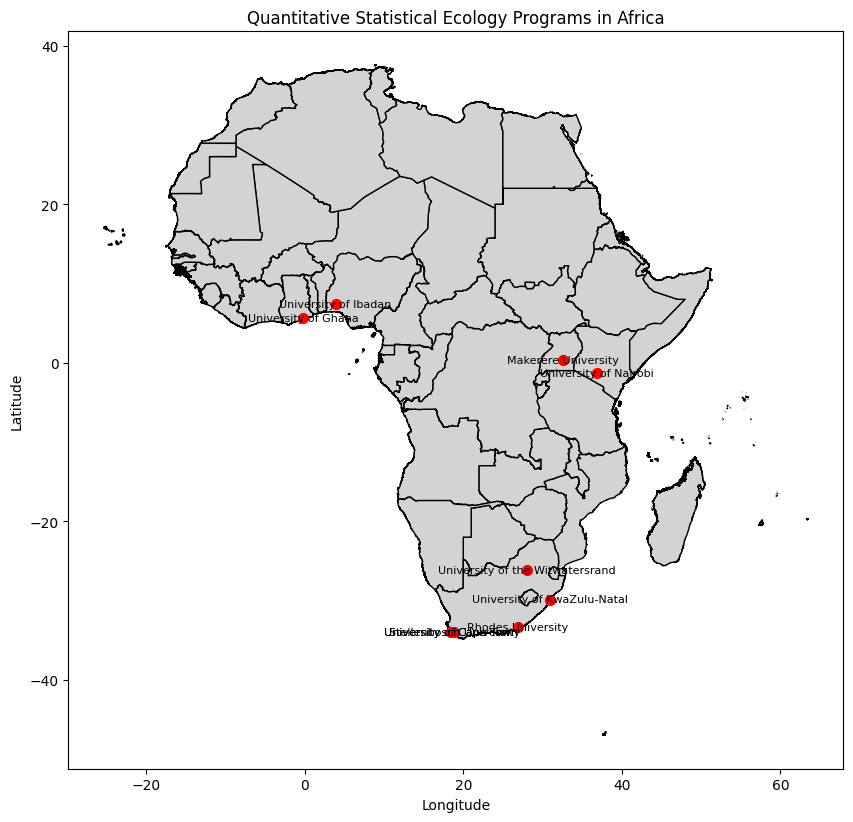

In [5]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Load shapefile or GeoJSON file of African country boundaries
africa_shapefile = "/Users/asmaatbaeen/Desktop/codePhD/Ch1/afr_g2014_2013_0/afr_g2014_2013_0.shp"  # Replace with the actual file path

longitudes = result["Longitude"]
latitudes = result["Latitude"]

# Create a GeoDataFrame from latitude and longitude values
geometry = gpd.points_from_xy(longitudes, latitudes)
program_gdf = gpd.GeoDataFrame(result, geometry=geometry)

# Read shapefile of African country boundaries
africa_gdf = gpd.read_file(africa_shapefile)

# Plotting
fig, ax = plt.subplots(figsize=(10, 10))

# Plot African country boundaries
africa_gdf.plot(ax=ax, color="lightgray", edgecolor="black")

# Plot quantitative statistical ecology program locations
program_gdf.plot(ax=ax, color="red", markersize=50)

# Add university names as labels
for x, y, label in zip(longitudes, latitudes, result["University"]):
    ax.text(x, y, label, fontsize=8, ha='center', va='center')

# Set plot title and labels
ax.set_title("Quantitative Statistical Ecology Programs in Africa")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

# Show the plot
plt.show()
